<a href="https://colab.research.google.com/github/nikhilans/global-education-analysis/blob/main/CH_Nikhila_N_S_World_Bank_Global_Education_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>

In [134]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
path = '/content/drive/MyDrive/AlmaBetter - Cohort Himalaya/Module 1: Python for Data Science/World Bank Global Education Analysis - Nikhila N S/data/'

In [136]:
# Import packages
import pandas as pd
import numpy as np

In [137]:
df_country = pd.read_csv(path+ "EdStatsCountry.csv")
df_data = pd.read_csv(path + "EdStatsData.csv")
df_series = pd.read_csv(path + "EdStatsSeries.csv")
df_footnote = pd.read_csv(path + "EdStatsFootNote.csv")
df_countryseries = pd.read_csv(path + "EdStatsCountry-Series.csv")

Let's try to understand what each dataset contains

In [138]:
df_country.head(2)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN


In [139]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [140]:
df_country['Special Notes'].unique()

array(['SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.',
       'Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.',
       'April 2013 database update: Based on IMF data, national accounts data were revised for 2000 onward; the base year changed to 2002.',
       nan,
       'Arab World aggregate. Arab World is composed of members of the League of Arab States.',
       'April 2013 database update: Based on data from the National Bureau of Statistics, national accounts data were revised for 2001 onward; the base year changed to 2007.',
       'April 2012 database update: Based on official government statistics, national accounts data were revised for 2000 onward; the base year changed to 2006.',
       '

In [141]:
df_country['Region'].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', nan, 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [142]:
df_country['Country Code'].nunique()

241

In [143]:
df_data.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [145]:
df_data['Indicator Name'].nunique()

3665

In [146]:
df_data['Country Code'].nunique()

242

In [147]:
df_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [16]:
df_data_subset2 = df_data[~df_data['2020'].isna()][['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100']]

In [17]:
df_data_subset2['Indicator Name'].unique()

array(['Wittgenstein Projection: Mean years of schooling. Age 0-19. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 0-19. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 0-19. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Female',
       'Wittgenstein Projection: Mean Years of Schooling. Age 15+. Gender Gap',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 15+. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 15-19. Total',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Female',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Male',
       'Wittgenstein Projection: Mean years of schooling. Age 20-24. Total',
     

In [13]:
df_data_subset1 = df_data[~df_data['1970'].isna()].iloc[:, 0:51]

In [14]:
df_data_subset1['Indicator Name'].nunique()

831

In [165]:
# Let's look at which years have the least data available
years = df_data.iloc[:, 4:-1]
percent_missing = years.isnull().sum() * 100 / len(years)
percent_missing =  pd.DataFrame({'years': years.columns,
                                 'percent_missing': percent_missing})

percent_missing.T

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
years,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
percent_missing,91.8496,95.9933,95.984,95.9924,95.9715,90.1564,95.7738,95.7636,95.7634,95.8498,89.9516,95.628,95.7707,95.6637,95.6472,89.8193,95.5609,95.6433,95.6533,95.7674,85.9735,91.6073,91.4826,91.4545,91.2663,85.1892,91.3401,91.7183,90.4261,86.6011,80.0801,86.0745,85.9961,85.3018,85.4764,79.2421,84.18,84.5228,84.8481,83.9775,72.665,83.5374,83.3962,84.4961,87.1705,85.2234,98.1442,99.9839,94.2007,94.2007,94.2007,94.2007,94.2007,94.2007,94.2007,94.2007,94.2007,94.2007,94.2007,94.2007,94.2007,94.2007,94.2007,94.2007,94.2007


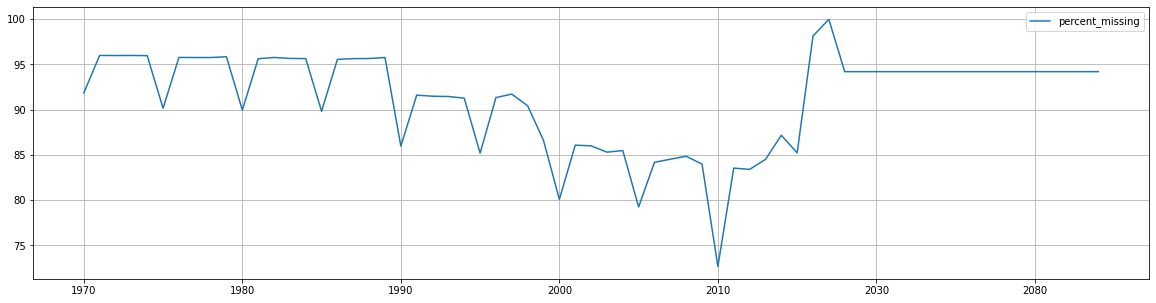

In [166]:
from matplotlib import pyplot as plt
%matplotlib inline
percent_missing.plot(figsize=(20,5), grid=True)
plt.show()

Null values are least starting from 2000 to 2015 - which means, most data is available for the years 2000 to 2010
Also, post 2020, the data mostly contains only projections

In [20]:
df_data_subset = df_data.drop(df_data.iloc[:, 4:34], axis=1)
df_data_subset = df_data_subset.drop(df_data_subset.iloc[:, 20:], axis=1)
df_data_subset.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
df_data_subset[df_data_subset['Indicator Name'].str.contains('GDP')]['Indicator Name'].unique()

array(['GDP at market prices (constant 2005 US$)',
       'GDP at market prices (current US$)',
       'GDP per capita (constant 2005 US$)',
       'GDP per capita (current US$)',
       'GDP per capita, PPP (constant 2011 international $)',
       'GDP per capita, PPP (current international $)',
       'GDP, PPP (constant 2011 international $)',
       'GDP, PPP (current international $)',
       'Government expenditure in educational institutions as % of GDP (%)',
       'Government expenditure in post-secondary non-tertiary institutions as % of GDP (%)',
       'Government expenditure in pre-primary institutions as % of GDP (%)',
       'Government expenditure in primary institutions as % of GDP (%)',
       'Government expenditure in secondary institutions education as % of GDP (%)',
       'Government expenditure in tertiary institutions as % of GDP (%)',
       'Government expenditure on education as % of GDP (%)',
       'Government expenditure on post-secondary non-tertiary edu

In [176]:
df_data_subset[df_data_subset['Indicator Name'].str.contains('literacy')]['Indicator Name'].unique()

array(['Adult literacy rate, population 15+ years, both sexes (%)',
       'Adult literacy rate, population 15+ years, female (%)',
       'Adult literacy rate, population 15+ years, gender parity index (GPI)',
       'Adult literacy rate, population 15+ years, male (%)',
       'Elderly literacy rate, population 65+ years, both sexes (%)',
       'Elderly literacy rate, population 65+ years, female (%)',
       'Elderly literacy rate, population 65+ years, gender parity index (GPI)',
       'Elderly literacy rate, population 65+ years, male (%)',
       'PIAAC: Adults by literacy proficiency level (%). Below Level 1',
       'PIAAC: Adults by literacy proficiency level (%). Level 1',
       'PIAAC: Adults by literacy proficiency level (%). Level 2',
       'PIAAC: Adults by literacy proficiency level (%). Level 3',
       'PIAAC: Adults by literacy proficiency level (%). Level 4',
       'PIAAC: Adults by literacy proficiency level (%). Level 5',
       'PIAAC: Female adults by litera

In [183]:
df1 = pd.merge(df_data_subset, df_country[['Country Code', 'Region', 'Income Group']], how = 'left', on = 'Country Code').reset_index(drop=True)
df1.shape

(886930, 22)

In [184]:
df1['Region'].value_counts()

Europe & Central Asia         208905
Sub-Saharan Africa            175920
Latin America & Caribbean     150265
East Asia & Pacific           131940
Middle East & North Africa     76965
South Asia                     29320
North America                  10995
Name: Region, dtype: int64

In [200]:
df1.groupby(['Region', 'Country Name']).size()

Region               Country Name     
East Asia & Pacific  American Samoa       3665
                     Australia            3665
                     Brunei Darussalam    3665
                     Cambodia             3665
                     China                3665
                                          ... 
Sub-Saharan Africa   Tanzania             3665
                     Togo                 3665
                     Uganda               3665
                     Zambia               3665
                     Zimbabwe             3665
Length: 214, dtype: int64

In [203]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   2000            176676 non-null  float64
 5   2001            123509 non-null  float64
 6   2002            124205 non-null  float64
 7   2003            130363 non-null  float64
 8   2004            128814 non-null  float64
 9   2005            184108 non-null  float64
 10  2006            140312 non-null  float64
 11  2007            137272 non-null  float64
 12  2008            134387 non-null  float64
 13  2009            142108 non-null  float64
 14  2010            242442 non-null  float64
 15  2011            146012 non-null  float64
 16  2012            147264 non-null  float64
 17  2013      

In [206]:
df2 = df1[~df1['Region'].isna()]

df2[df2['Region'].str.contains('South Asia')]['Country Name'].unique()

array(['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives',
       'Nepal', 'Pakistan', 'Sri Lanka'], dtype=object)

In [207]:
df2['Income Group'].unique()

array(['Low income', 'Upper middle income', 'High income: nonOECD',
       'Lower middle income', 'High income: OECD'], dtype=object)

In [208]:
df2[df2['Income Group'].str.contains('Lower middle income')]['Country Name'].unique()

array(['Armenia', 'Bhutan', 'Bolivia', 'Cabo Verde', 'Cameroon',
       'Congo, Rep.', "Cote d'Ivoire", 'Djibouti', 'Egypt, Arab Rep.',
       'El Salvador', 'Georgia', 'Ghana', 'Guatemala', 'Guyana',
       'Honduras', 'India', 'Indonesia', 'Kiribati', 'Kosovo',
       'Kyrgyz Republic', 'Lao PDR', 'Lesotho', 'Mauritania',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Morocco',
       'Nicaragua', 'Nigeria', 'Pakistan', 'Papua New Guinea', 'Paraguay',
       'Philippines', 'Samoa', 'Sao Tome and Principe', 'Senegal',
       'Solomon Islands', 'South Sudan', 'Sri Lanka', 'Sudan',
       'Swaziland', 'Syrian Arab Republic', 'Timor-Leste', 'Ukraine',
       'Uzbekistan', 'Vanuatu', 'Vietnam', 'West Bank and Gaza',
       'Yemen, Rep.', 'Zambia'], dtype=object)

In [209]:
df1[df1['Indicator Name'].str.contains('PISA')]['Indicator Name'].unique()

array(['PISA: 15-year-olds by mathematics proficiency level (%). Below Level 1',
       'PISA: 15-year-olds by mathematics proficiency level (%). Level 1',
       'PISA: 15-year-olds by mathematics proficiency level (%). Level 2',
       'PISA: 15-year-olds by mathematics proficiency level (%). Level 3',
       'PISA: 15-year-olds by mathematics proficiency level (%). Level 4',
       'PISA: 15-year-olds by mathematics proficiency level (%). Level 5',
       'PISA: 15-year-olds by mathematics proficiency level (%). Level 6',
       'PISA: 15-year-olds by reading proficiency level (%). Below Level 1B',
       'PISA: 15-year-olds by reading proficiency level (%). Level 1A',
       'PISA: 15-year-olds by reading proficiency level (%). Level 1B',
       'PISA: 15-year-olds by reading proficiency level (%). Level 2',
       'PISA: 15-year-olds by reading proficiency level (%). Level 3',
       'PISA: 15-year-olds by reading proficiency level (%). Level 4',
       'PISA: 15-year-olds by read

In [210]:
df1[df1['Indicator Name'].str.contains('TIMSS')]['Indicator Name'].unique()

array(['TIMSS: Distribution of 4th Grade Mathematics Scores: 10th Percentile Score',
       'TIMSS: Distribution of 4th Grade Mathematics Scores: 25th Percentile Score',
       'TIMSS: Distribution of 4th Grade Mathematics Scores: 50th Percentile Score',
       'TIMSS: Distribution of 4th Grade Mathematics Scores: 5th Percentile Score',
       'TIMSS: Distribution of 4th Grade Mathematics Scores: 75th Percentile Score',
       'TIMSS: Distribution of 4th Grade Mathematics Scores: 90th Percentile Score',
       'TIMSS: Distribution of 4th Grade Mathematics Scores: 95th Percentile Score',
       'TIMSS: Distribution of 4th Grade Science Scores: 10th Percentile Score',
       'TIMSS: Distribution of 4th Grade Science Scores: 25th Percentile Score',
       'TIMSS: Distribution of 4th Grade Science Scores: 50th Percentile Score',
       'TIMSS: Distribution of 4th Grade Science Scores: 5th Percentile Score',
       'TIMSS: Distribution of 4th Grade Science Scores: 75th Percentile Score',
  

In [211]:
df1[df1['Indicator Name'].str.contains('Enrolment')]['Indicator Name'].unique()

array(['Enrolment in early childhood education, both sexes (number)',
       'Enrolment in early childhood education, female (number)',
       'Enrolment in early childhood education, private institutions, both sexes (number)',
       'Enrolment in early childhood education, private institutions, female (number)',
       'Enrolment in early childhood education, public institutions, both sexes (number)',
       'Enrolment in early childhood education, public institutions, female (number)',
       'Enrolment in early childhood educational development programmes, both sexes (number)',
       'Enrolment in early childhood educational development programmes, female (number)',
       'Enrolment in early childhood educational development programmes, private institutions, both sexes (number)',
       'Enrolment in early childhood educational development programmes, private institutions, female (number)',
       'Enrolment in early childhood educational development programmes, public institutio

In [213]:
df1[df1['Indicator Name'].str.contains('Complete')]['Indicator Name'].unique()

array(['Barro-Lee: Percentage of female population age 15+ with primary schooling. Completed Primary',
       'Barro-Lee: Percentage of female population age 15+ with primary schooling. Total (Incomplete and Completed Primary)',
       'Barro-Lee: Percentage of female population age 15+ with secondary schooling. Completed Secondary',
       'Barro-Lee: Percentage of female population age 15+ with secondary schooling. Total (Incomplete and Completed Secondary)',
       'Barro-Lee: Percentage of female population age 15+ with tertiary schooling. Completed Tertiary',
       'Barro-Lee: Percentage of female population age 15+ with tertiary schooling. Total (Incomplete and Completed Tertiary)',
       'Barro-Lee: Percentage of female population age 15-19 with primary schooling. Completed Primary',
       'Barro-Lee: Percentage of female population age 15-19 with primary schooling. Total (Incomplete and Completed Primary)',
       'Barro-Lee: Percentage of female population age 15-19 with se

In [214]:
df1[df1['Indicator Name'].str.contains('Internet')]['Indicator Name'].unique()

array(['Internet users (per 100 people)'], dtype=object)

In [ ]:
df_series.head(2)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [11]:
df_series['Series Code'].nunique()

3665

In [13]:
df_series['Topic'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

In [ ]:
df_countryseries.head(2)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN


In [ ]:
df_countryseries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [ ]:
pd.set_option('display.max_colwidth', None)
df_countryseries['DESCRIPTION']

0                               Data sources : United Nations World Population Prospects
1                                Data sources: United Nations World Population Prospects
2                                Data sources: United Nations World Population Prospects
3                                                     Estimates are based on regression.
4                               Data sources : United Nations World Population Prospects
                                             ...                                        
608    Data sources : Statistics South Africa, United Nations World Population Prospects
609                              Data sources: United Nations World Population Prospects
610                             Data sources : United Nations World Population Prospects
611                             Data sources : United Nations World Population Prospects
612                              Data sources: United Nations World Population Prospects
Name: DESCRIPTION, Le

In [ ]:
df_countryseries['CountryCode'].nunique()

211

In [14]:
df_footnote.head(15)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN
5,ABW,SE.PRE.NENR,YR2000,Country estimation.,NaN
6,ABW,SE.SEC.ENRL.VO.FE,YR2005,Country estimation.,NaN
7,ABW,SE.SEC.ENRL.GC,YR2003,Country estimation.,NaN
8,ABW,SE.PRM.TCHR.FE,YR1999,Country estimation.,NaN
9,ABW,SE.PRE.TCHR.FE.ZS,YR2008,Country estimation.,NaN


In [ ]:
np.sort(df_footnote['Year'].unique())

array(['YR1970', 'YR1971', 'YR1972', 'YR1973', 'YR1974', 'YR1975',
       'YR1976', 'YR1977', 'YR1978', 'YR1979', 'YR1980', 'YR1981',
       'YR1982', 'YR1983', 'YR1984', 'YR1985', 'YR1986', 'YR1987',
       'YR1988', 'YR1989', 'YR1990', 'YR1991', 'YR1992', 'YR1993',
       'YR1994', 'YR1995', 'YR1996', 'YR1997', 'YR1998', 'YR1999',
       'YR2000', 'YR2001', 'YR2002', 'YR2003', 'YR2004', 'YR2005',
       'YR2006', 'YR2007', 'YR2008', 'YR2009', 'YR2010', 'YR2011',
       'YR2012', 'YR2013', 'YR2014', 'YR2015', 'YR2016', 'YR2017',
       'YR2020', 'YR2025', 'YR2030', 'YR2035', 'YR2040', 'YR2045',
       'YR2050', 'yr2012'], dtype=object)

In [ ]:
df_footnote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [ ]:
df_footnote['DESCRIPTION'].value_counts()

Country Data                                      191188
UNESCO Institute for Statistics (UIS) estimate    171527
Estimated                                         117155
UIS Estimation                                     31395
Country estimation.                                26308
                                                   ...  
Uncertainty bound is 68.9 - 76.3                       1
Uncertainty bound is 192.7 - 218.7                     1
Uncertainty bound is 193.9 - 220.9                     1
Uncertainty bound is 141.3 - 173.4                     1
Uncertainty bound is 65.8 - 85                         1
Name: DESCRIPTION, Length: 9102, dtype: int64

Initial understanding of each of the datasets:

* df_country(EdStatsCountry.csv) - contains list of all countries that are present in the data (total of 241 countries) - along with other features specific to the country like - Region, Income Group specific to the country etc
* df_data(EdStatsData.csv) - contains each country, with list of indicators (3665 unique indicators); contains measurement value for each indicator from years 1970 to 2017; from 2020 to 2100 - contains projections
* df_series - contains list of all indicators and the definition of each indicator
* df_countryseries - contains indicators and data sources for certain countries
* df_footnote - contains the estimations and uncertainty bounds for each year - looks like some years are missing

